In [1]:
import pandas as pd
import seaborn as sns
import spacy
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as P
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.models import load_model
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
tqdm.pandas()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59947 entries, 0 to 59946
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    59947 non-null  object
 1   label   59947 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 936.8+ KB


<Axes: xlabel='label', ylabel='count'>

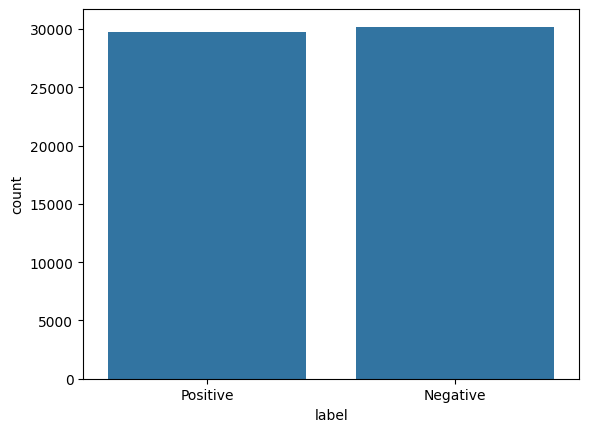

In [ ]:
TRAINDATA_FILE_PATH = '../dataSample/train_dataset.csv'
print("Reading data from file: ", TRAINDATA_FILE_PATH)
try:
    # SHOW DATA DISTRIBUTION
    names = ['text', 'label']
    df = pd.read_csv(TRAINDATA_FILE_PATH, names=names)
    df.sample(5)
    df.info()
    df.groupby('text').nunique()
    df['label'] = df['label'].map({0: 'Negative', 1: 'Positive'})
    sns.countplot(x='label', data=df)
except FileNotFoundError:
    print(f"File not found: {TRAINDATA_FILE_PATH}")
except pd.errors.EmptyDataError:
    print("No data found in the file.")
except pd.errors.ParserError:
    print("Error parsing data.")
except Exception as e:
    print(f"An error occurred: {e}")

In [6]:

def clean_data(data, re_letters):
    data['text'] = data['text'].apply(lambda x: x.lower())
    data['text'] = data['text'].apply(lambda x: re_letters.sub('', x))


def remove_stopwords(text):
    return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))


def lemmatize(text):
    return ' '.join([x.lemma_ for x in nlp(text)])


def build_wordcloud(data, label_type, max_words, c_width, c_height):
    text = ' '.join(data['text'][data['label'] == label_type])
    wc = WordCloud(max_words=max_words, width=c_width, height=c_height, collocations=False).generate(text)
    return wc.to_image()

y = 5

In [7]:
#adding stopwords to the nlp
try:
    nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])
    nlp.add_pipe('sentencizer')
    nlp.Defaults.stop_words.add("game")
    nlp.Defaults.stop_words.add("play")
    nlp.Defaults.stop_words.add("t")
except OSError as e:
    print(f"Error loading spaCy model: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


In [9]:
df['text']=df['text'].apply(remove_stopwords)
df.sample(5)

df['text']=df['text'].progress_apply(lemmatize)
df.sample(5)

  7%|▋         | 3977/59947 [00:11<02:44, 341.16it/s]


KeyboardInterrupt: 

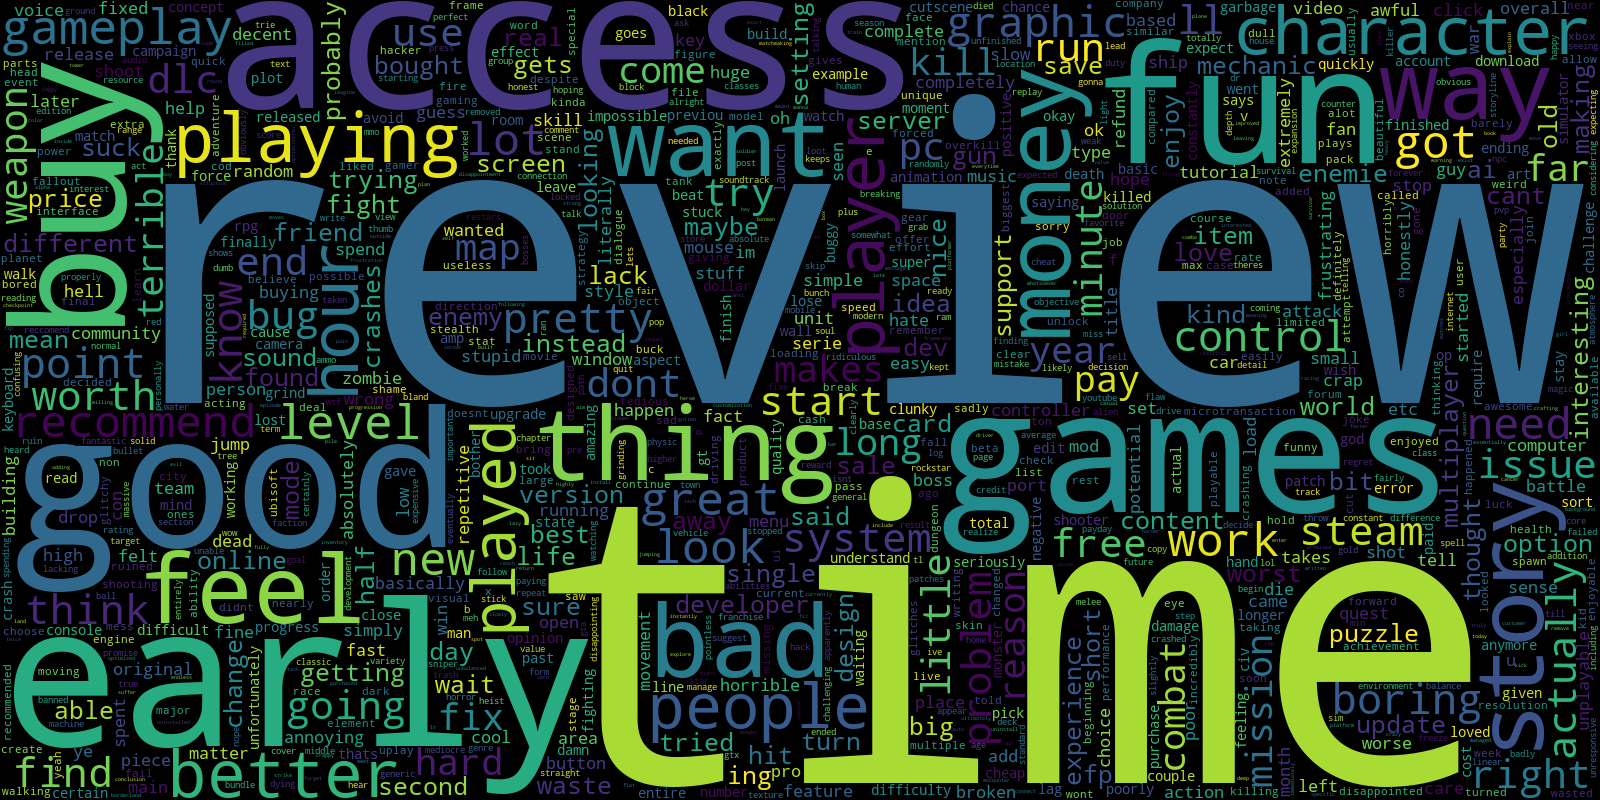

In [10]:
# build wordclouds for positive and negative reviews
build_wordcloud(df, 'Negative', 1000, 1600, 800)

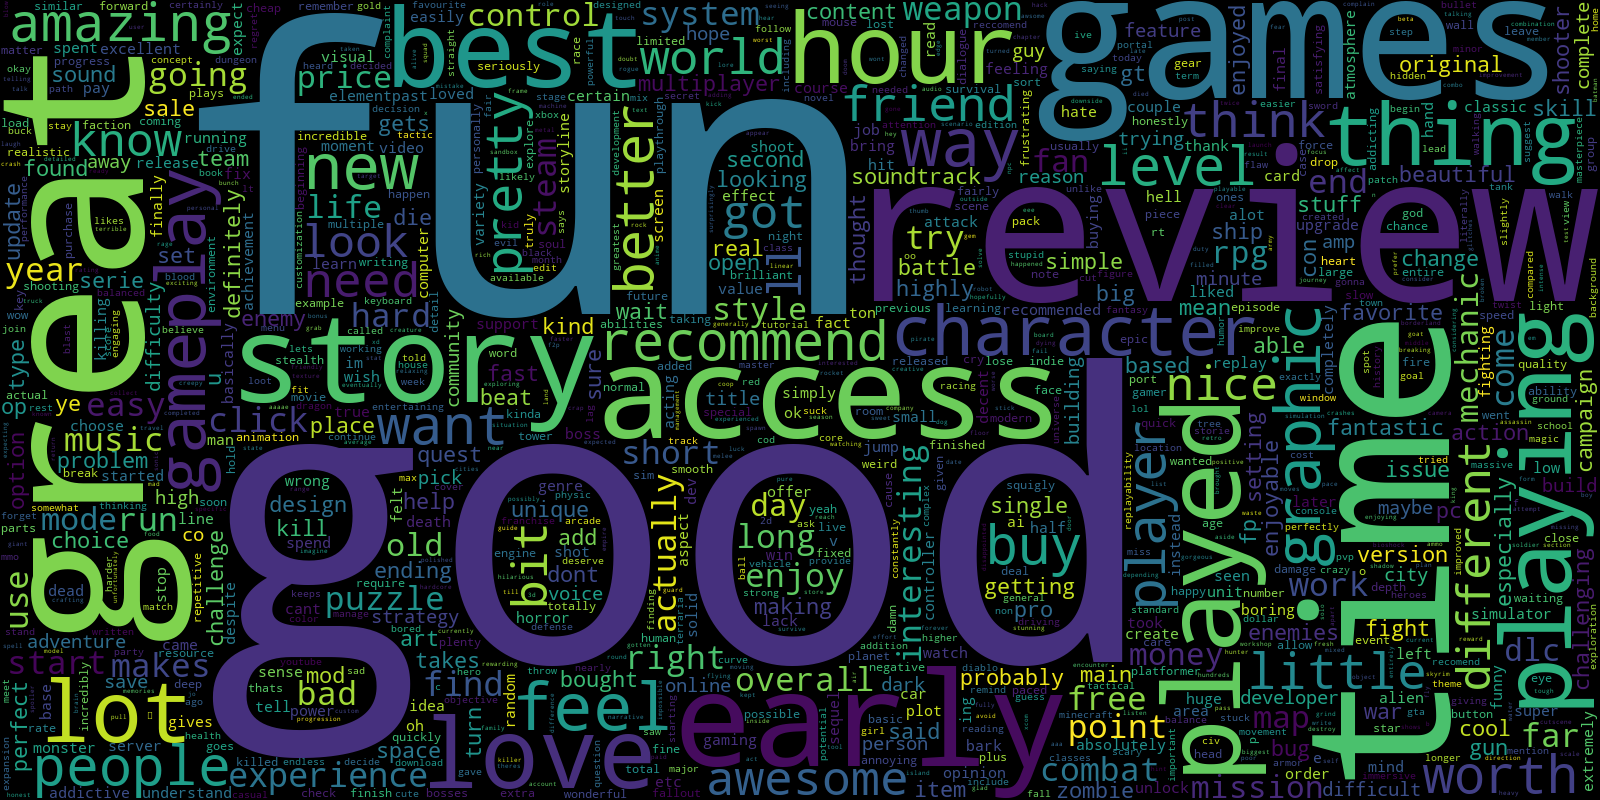

In [11]:
build_wordcloud(df, 'Positive', 1000, 1600, 800)

In [ ]:
#load the pre-trained model
current_model = load_model('..\\Saved_models\\12_05_model.h5')